In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("AAPL.csv")

In [6]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-14,190.229996,191.179993,189.630005,190.690002,189.682648,41573900
1,2023-07-17,191.899994,194.320007,191.809998,193.990005,192.965195,50520200
2,2023-07-18,193.350006,194.330002,192.419998,193.729996,192.706573,48353800
3,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,80507300
4,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,59581200


In [7]:
#Adding additional features:

In [17]:
#1. SMA (Simple Moving Average) : Average closing prices over a period of time (3 days) [sma = df['Close'].rolling(window=s3).mean()]
sums =[]
avg=[]
SMA=[]
for cl_pr in data.Close:
    sums.append(cl_pr)
    if len(sums) == 3:
        avg.append(sum(sums)/len(sums))
        sums = sums[1:]

#The average is calculated for 3 days so the first 2 elements must be NaN since there are no 3 closing prices
vals = [np.nan , np.nan]
SMA = vals + avg

#Adding the column
data['SMA'] = SMA

In [19]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA
0,2023-07-14,190.229996,191.179993,189.630005,190.690002,189.682648,41573900,NaN
1,2023-07-17,191.899994,194.320007,191.809998,193.990005,192.965195,50520200,NaN
2,2023-07-18,193.350006,194.330002,192.419998,193.729996,192.706573,48353800,192.803334
3,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,80507300,194.273336
4,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,59581200,193.986669


In [30]:
#2. EMA (Exponential Moving Average) : Applies moe importance (weights) to the recently used values relative to the older values using the formula : EMA(t) = a.P(t) + (1-a) * EMA(t)
EMA=[]
span = 4
initial_EMA = SMA[span-1]
smoothing_rate = 2/(span  + 1)
for i in range(span , len(data['Close'])):
    ema = smoothing_rate * data['Close'].iloc[i] + (1-smoothing_rate) * initial_EMA
    EMA.append(ema)
    initial_EMA = ema
    
EMA = [None] * (span) + EMA
data['EMA'] = EMA

In [31]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA
0,2023-07-14,190.229996,191.179993,189.630005,190.690002,189.682648,41573900,NaN,NaN
1,2023-07-17,191.899994,194.320007,191.809998,193.990005,192.965195,50520200,NaN,NaN
2,2023-07-18,193.350006,194.330002,192.419998,193.729996,192.706573,48353800,192.803334,NaN
3,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,80507300,194.273336,NaN
4,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,59581200,193.986669,193.816003


In [52]:
#3. RSI (Relative Strength Index) : Used to monitor speed and rate of changes in features to identify any oversold or undersold condition using the formula: RSI = 100 - (100/(1+(avg_gain/avg_loss))
def calculate_RSI(data , window):
    delta = data.diff()
    gain = delta.where(delta > 0 , 0)
    loss = -delta.where(delta < 0 , 0)
    avg_gain = gain.rolling(window = window , min_periods = 1).mean()
    avg_loss = loss.rolling(window = window , min_periods = 1).mean()
    rs = avg_gain/avg_loss
    rsi = 100 - (100/(1 + rs))
    return rsi

RSI = calculate_RSI(data['Close'] , 14)
data['RSI'] = RSI

In [53]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI
0,2023-07-14,190.229996,191.179993,189.630005,190.690002,189.682648,415.739,185.195502,185.057292,NaN
1,2023-07-17,191.899994,194.320007,191.809998,193.990005,192.965195,505.202,185.195502,185.057292,100.000000
2,2023-07-18,193.350006,194.330002,192.419998,193.729996,192.706573,483.538,192.803334,185.057292,92.696401
3,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,805.073,194.273336,185.057292,94.726007
4,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,595.812,193.986669,193.816003,67.681122


In [38]:
#data preprocessing

In [54]:
#1. Removing null values (NaN) by replacing them with the respective column means
for i in data:
    if data[i].isna().sum() > 0:
        data[i].fillna(data[i].mean() , inplace = True)

In [65]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI
0,2023-07-14,190.229996,191.179993,189.630005,190.690002,189.682648,41573900.0,185.195502,185.057292,52.515864
1,2023-07-17,191.899994,194.320007,191.809998,193.990005,192.965195,50520200.0,185.195502,185.057292,100.000000
2,2023-07-18,193.350006,194.330002,192.419998,193.729996,192.706573,48353800.0,192.803334,185.057292,92.696401
3,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,80507300.0,194.273336,185.057292,94.726007
4,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,59581200.0,193.986669,193.816003,67.681122


In [66]:
#3. For a smoother flow of the gradient descent, the volume feature will have to be scaled because its range is much higher compared to the other features
data['Volume'] = data['Volume'] /100000

In [67]:
#volume unit is *100000
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI
0,2023-07-14,190.229996,191.179993,189.630005,190.690002,189.682648,415.739,185.195502,185.057292,52.515864
1,2023-07-17,191.899994,194.320007,191.809998,193.990005,192.965195,505.202,185.195502,185.057292,100.000000
2,2023-07-18,193.350006,194.330002,192.419998,193.729996,192.706573,483.538,192.803334,185.057292,92.696401
3,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,805.073,194.273336,185.057292,94.726007
4,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,595.812,193.986669,193.816003,67.681122


In [246]:
x = data[['Open' , 'High' , 'Low' , 'Adj Close' , 'SMA' , 'EMA' , 'RSI'  ]]
y = data['Close']

In [247]:
x

,Open,High,Low,Adj Close,SMA,EMA,RSI
0,190.229996,191.179993,189.630005,189.682648,185.195502,185.057292,52.515864
1,191.899994,194.320007,191.809998,192.965195,185.195502,185.057292,100.000000
2,193.350006,194.330002,192.419998,192.706573,192.803334,185.057292,92.696401
3,193.100006,198.229996,192.649994,194.069351,194.273336,185.057292,94.726007
4,195.089996,196.470001,192.500000,192.109756,193.986669,193.816003,67.681122
...,...,...,...,...,...,...,...
246,227.089996,227.850006,223.250000,227.820007,225.236669,224.069335,68.856086
247,227.929993,229.399994,226.369995,228.679993,227.613332,225.913598,66.086250
248,229.300003,233.080002,229.250000,232.979996,229.826665,228.740157,73.808920
249,231.389999,232.389999,225.770004,227.570007,229.743332,228.272097,72.334605


In [248]:
feature_list = np.array(x.values.tolist())
target_list = np.array(y.values.tolist())

In [252]:
w = [0.5 , 0.3 , 0.2 , 0.1 , 0.4 , 0.32 , 0.24 ]
b = 15

In [250]:
def predict (w , x , b):
    pred = np.dot(w , x) + b
    return pred

In [140]:
def compute_cost(w , x , y , b , m):
    n = len(x)
    cost = 0
    for i in range(n):
        cost = cost + (np.dot(w , x[i]) +b - y[i]) ** 2
    cost = (1/(2 * m)) * cost
    return cost

In [102]:
def compute_gradient(w , x , y , m , b):
    row , col = x.shape
    dj_dw = np.zeros(col)
    dj_db = 0
    for i in range(row):
        f_wb_i = np.dot(x[i] , w) + b - y[i]
        for a in range(col):
            dj_dw[a] = f_wb_i * x[i,a] * (1/m)
        dj_db = f_wb_i * (1/m)
    return dj_dw , dj_db
            

In [109]:
def gradient_descent(w , x , y , m , b , a , iters):
    cost_list = []
    wb_list = []
    for i in range(iters):
        dj_dw , dj_db = compute_gradient(w , x , y , m , b)
        w = w - (a*dj_dw)
        b = b - (a*dj_db)
        cost = compute_cost(w , x , y , b , m)
        cost_list.append(cost)
        wb_list.append((w , b))
    return w , b , cost_list , wb_list

In [253]:
weights , bias , cl , wbl = gradient_descent(w  , feature_list , target_list , len(y) , b , 0.0001 , 100000)

In [254]:
predictions = np.zeros(len(y))
for i in range(len(y)):
    predictions[i] = predict (weights , feature_list[i] , bias)

In [255]:
print(f"Final weights after gradient descent: {weights}\nFinal bias after gradient descent: {bias}")

Final weights after gradient descent: [ 0.34316259  0.14061395  0.04332702 -0.0579473   0.24217374  0.16298497
  0.18640535]
Final bias after gradient descent: 14.999314881141318


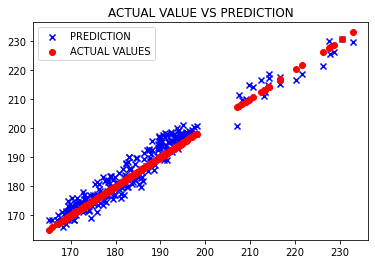

In [263]:
plt.scatter(target_list , predictions , marker = 'x' , c = 'b' , label = 'PREDICTION')
plt.scatter(target_list , y , c = 'r' , label = 'ACTUAL VALUES')
plt.legend()
plt.title('ACTUAL VALUE VS PREDICTION')
plt.show()

In [258]:
choice = int(input("Do you want to calculte the Price for the stock? (1-Yes / 0-No): "))
while(choice == 1):
    ft = []
    a = float(input("Enter the opening price: "))
    ft.append(a)
    b = float(input("Enter the highest price recorded on that day: "))
    ft.append(b)
    c = float(input("Enter the Lowest price recorded on that day: "))
    ft.append(c)
    d = float(input("Enter the adjusted closing price of that day: "))
    ft.append(d)
    e = float(input("Enter the simple moving average: "))
    ft.append(e)
    f = float(input("Enter the exponential moving average: "))
    ft.append(f)
    g = float(input("Enter the RSI: "))
    ft.append(g)
    cl_pr = predict(weights , ft , b)
    print(f"Predicted Closing price: {cl_pr}")
    choice = int(input("DO YOU WANT TO CONTINUE? (1-YES/ 0-NO): "))


Do you want to calculte the Price for the stock? (1-Yes / 0-No): 1
Enter the opening price: 191.996
Enter the highest price recorded on that day: 193.002
Enter the Lowest price recorded on that day: 191.444
Enter the adjusted closing price of that day: 192.346
Enter the simple moving average: 184.237
Enter the exponential moving average: 185.003
Enter the RSI: 65
Predicted Closing price: 370.06180567134186
DO YOU WANT TO CONTINUE? (1-YES/ 0-NO): 0
